# Importação de Bibliotecas

In [1]:
# Sistema
import sys

# Data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Data visualization
import pickle
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Model and performance
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Abrindo o arquivo dos dados

In [2]:
base = pd.read_csv('Star_dataset.csv', ',')
base.head()

C:\Users\camil\AppData\Local\Temp\ipykernel_8852\1891188213.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  base = pd.read_csv('Star_dataset.csv', ',')


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


## Dimensões do dataset

In [3]:
print(f'Number of columns: {base.shape[1]}')
print(f'Number of rows: {base.shape[0]}')

Number of columns: 7
Number of rows: 240


## Informação dos dados

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
base.isnull().values.any()

False

# Análise de Correlação

In [6]:
corr = base.corr()

C:\Users\camil\AppData\Local\Temp\ipykernel_8852\1888619018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = base.corr()


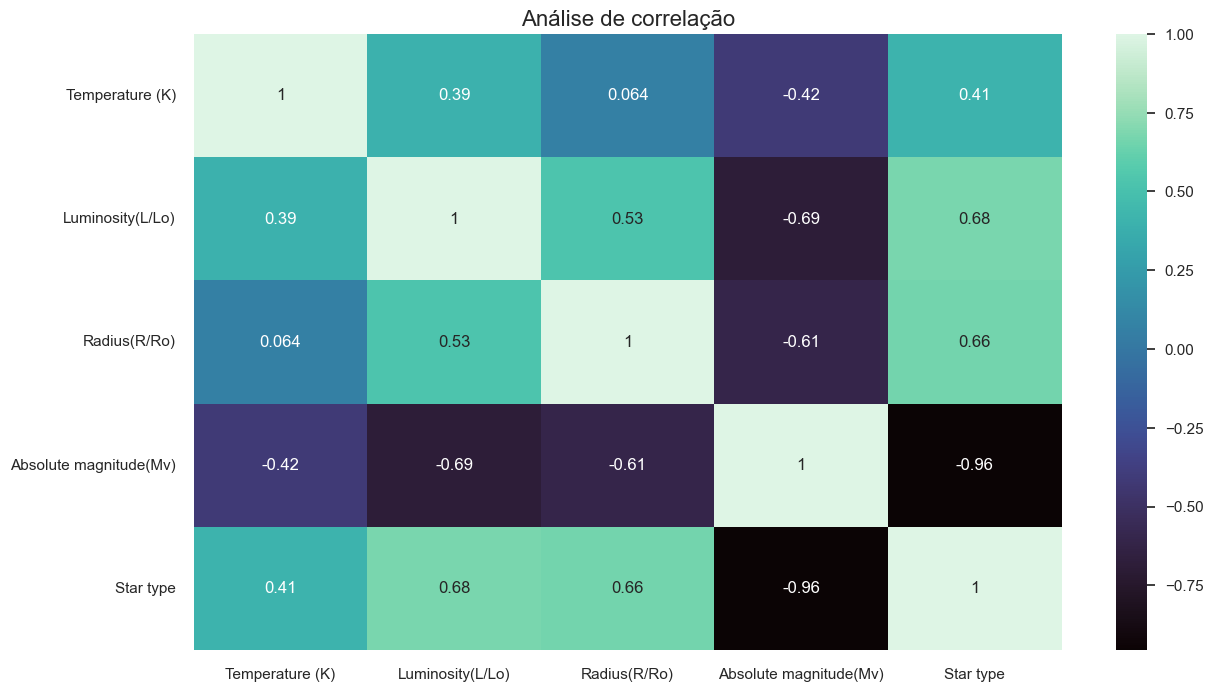

In [7]:
# correlação entre variáveis
sns.set()

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
ax = sns.heatmap(corr, annot=True, fmt='.2g', cmap = 'mako')
ax.set_title('Análise de correlação', fontsize= 16)
plt.show()

## Renomeando os atributos

In [8]:
base.rename(columns={"Temperature (K)": "Temperature"}, inplace=True)
base.rename(columns={"Luminosity(L/Lo)": "Luminosity"}, inplace=True)
base.rename(columns={"Radius(R/Ro)": "Radius"}, inplace=True)
base.rename(columns={"Absolute magnitude(Mv)": "Absolute_magnitude"}, inplace=True)
base.rename(columns={"Star type": "Type"}, inplace=True)
base.rename(columns={"Star color": "Star_color"}, inplace=True)
base.rename(columns={"Spectral Class": "Spectral_class"}, inplace=True)
base

,Temperature,Luminosity,Radius,Absolute_magnitude,Type,Star_color,Spectral_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


# Análise Exploratória

## Classe Tipo

In [9]:
base['Type'].replace(0, 'Brown_Dwarf', inplace = True)

base['Type'].replace(1, 'Red_Dwarf', inplace = True)

base['Type'].replace(2, 'White_Dwarf', inplace = True)

base['Type'].replace(3, 'Main_Sequence', inplace = True)

base['Type'].replace(4, 'Supergiant', inplace = True)

base['Type'].replace(5, 'Hypergiant', inplace = True)

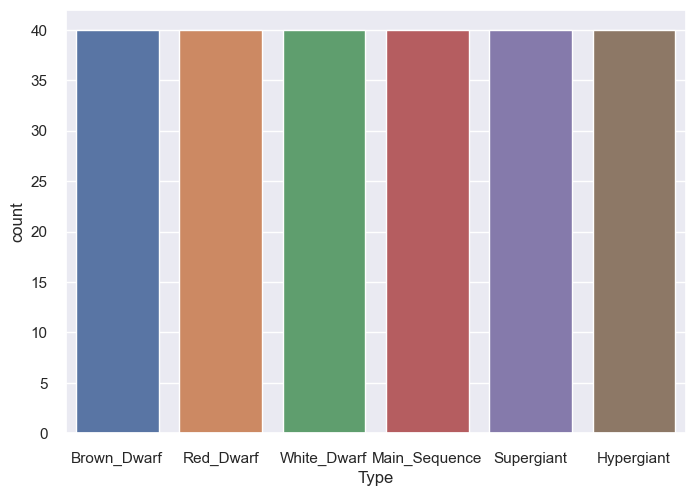

In [10]:
sns.set()

np.unique(base['Type'], return_counts=True), sns.countplot(x = base['Type']);

## Cor da Estrela

In [11]:
np.unique(base['Star_color'], return_counts=True)

(array(['Blue', 'Blue ', 'Blue White', 'Blue white', 'Blue white ',
        'Blue-White', 'Blue-white', 'Orange', 'Orange-Red',
        'Pale yellow orange', 'Red', 'White', 'White-Yellow', 'Whitish',
        'Yellowish', 'Yellowish White', 'white', 'yellow-white',
        'yellowish'], dtype=object),
 array([ 55,   1,  10,   3,   1,   1,  26,   2,   1,   1, 112,   7,   1,
          2,   1,   3,   3,   8,   2], dtype=int64))

In [12]:
base.replace('Blue ', 'Blue', inplace = True)

base.replace(['Blue White', 'Blue white', 'Blue white ', 'Blue-white'], 'Blue-White', inplace= True)

base.replace('white', 'White', inplace= True)

base.replace('yellowish', 'Yellowish', inplace = True)

base.replace('yellow-white', 'Yellow White', inplace = True)

In [13]:
np.unique(base['Star_color'], return_counts=True)

(array(['Blue', 'Blue-White', 'Orange', 'Orange-Red', 'Pale yellow orange',
        'Red', 'White', 'White-Yellow', 'Whitish', 'Yellow White',
        'Yellowish', 'Yellowish White'], dtype=object),
 array([ 56,  41,   2,   1,   1, 112,  10,   1,   2,   8,   3,   3],
       dtype=int64))

In [14]:
count_star_color = pd.DataFrame({'Count': base['Star_color'].value_counts(ascending= True)})

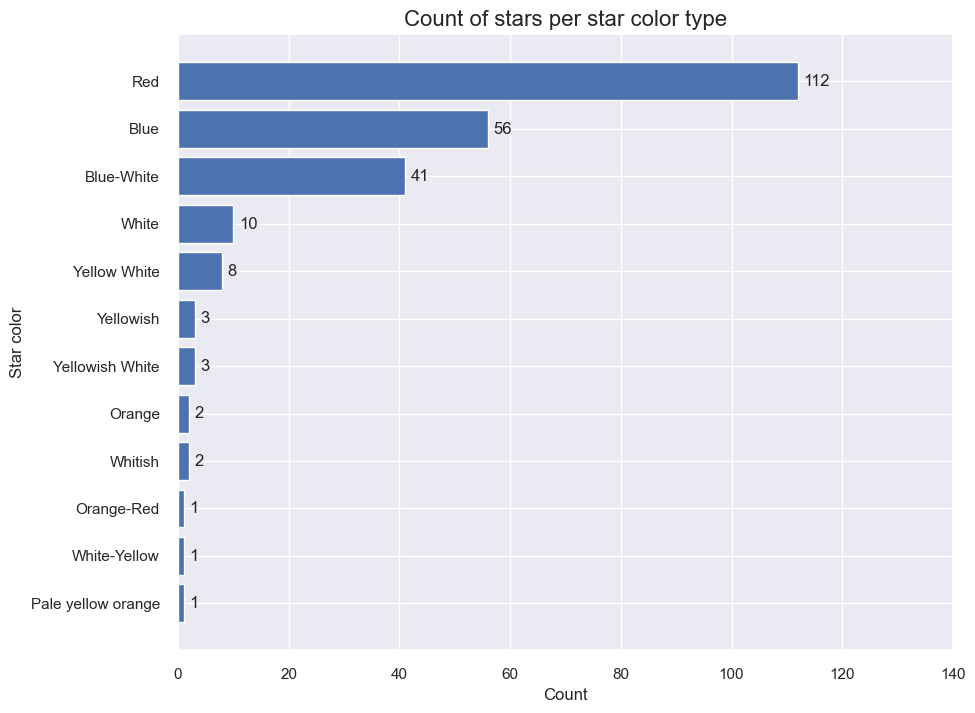

In [15]:
sns.set()

plt.figure(figsize= (10, 8))
bars = plt.barh(count_star_color.index, count_star_color['Count'])

for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 1, index - 0.1, bar.get_width())

plt.title('Count of stars per star color type', fontsize= 16)
plt.xlabel('Count')
plt.ylabel('Star color')
plt.xlim([0, 140])
plt.show()

## Análise das Correlações

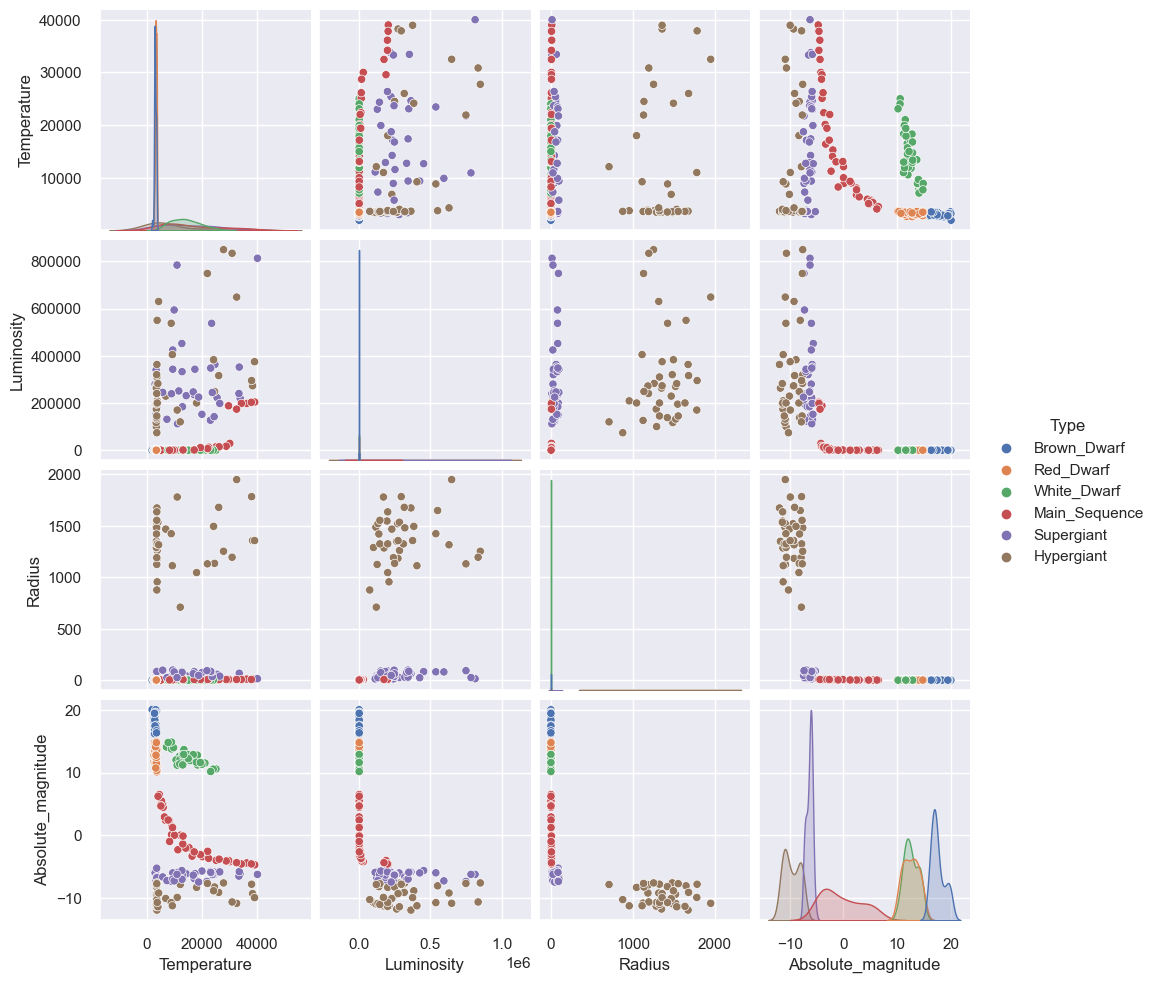

In [16]:
# correlação entre variáveis
sns.set()

sns.pairplot(base, hue = "Type")
plt.show()

# Definindo classe alvo

In [17]:
y = base['Type']
y

0      Brown_Dwarf
1      Brown_Dwarf
2      Brown_Dwarf
3      Brown_Dwarf
4      Brown_Dwarf
          ...     
235     Hypergiant
236     Hypergiant
237     Hypergiant
238     Hypergiant
239     Hypergiant
Name: Type, Length: 240, dtype: object

In [18]:
y_classe = y.values
y_classe

array(['Brown_Dwarf', 'Brown_Dwarf', 'Brown_Dwarf', 'Brown_Dwarf',
       'Brown_Dwarf', 'Brown_Dwarf', 'Brown_Dwarf', 'Brown_Dwarf',
       'Brown_Dwarf', 'Brown_Dwarf', 'Red_Dwarf', 'Red_Dwarf',
       'Red_Dwarf', 'Red_Dwarf', 'Red_Dwarf', 'Red_Dwarf', 'Red_Dwarf',
       'Red_Dwarf', 'Red_Dwarf', 'Red_Dwarf', 'White_Dwarf',
       'White_Dwarf', 'White_Dwarf', 'White_Dwarf', 'White_Dwarf',
       'White_Dwarf', 'White_Dwarf', 'White_Dwarf', 'White_Dwarf',
       'White_Dwarf', 'Main_Sequence', 'Main_Sequence', 'Main_Sequence',
       'Main_Sequence', 'Main_Sequence', 'Main_Sequence', 'Main_Sequence',
       'Main_Sequence', 'Main_Sequence', 'Main_Sequence', 'Supergiant',
       'Supergiant', 'Supergiant', 'Supergiant', 'Supergiant',
       'Supergiant', 'Supergiant', 'Supergiant', 'Supergiant',
       'Supergiant', 'Hypergiant', 'Hypergiant', 'Hypergiant',
       'Hypergiant', 'Hypergiant', 'Hypergiant', 'Hypergiant',
       'Hypergiant', 'Hypergiant', 'Hypergiant', 'Brown_Dwarf',


# Definindo os atributos

In [19]:
X = base.drop('Type', axis= 1)
X

,Temperature,Luminosity,Radius,Absolute_magnitude,Star_color,Spectral_class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


# Pre-processamento

In [20]:
class AtributoEncoder (BaseEstimator, TransformerMixin):
    def fit (self, X, y = None):
        return self
    
    def transform (self, X):
        # Atributo categórico ordinal
        X['Spectral_class'] = X['Spectral_class'].map({'M': 6, 'K': 5, 'G': 4, 'F': 3, 'A': 2, 'B': 1, 'O': 0})
        
        # Atributo categórico nominal
        label_encoder = LabelEncoder()
        X['Star_color'] = label_encoder.fit_transform(X['Star_color'])
        
        return X

In [21]:
ae = AtributoEncoder()

X = ae.fit_transform(X)
X_values = X.iloc[:, 0:6].values
X_values

array([[ 3.06800e+03,  2.40000e-03,  1.70000e-01,  1.61200e+01,
         5.00000e+00,  6.00000e+00],
       [ 3.04200e+03,  5.00000e-04,  1.54200e-01,  1.66000e+01,
         5.00000e+00,  6.00000e+00],
       [ 2.60000e+03,  3.00000e-04,  1.02000e-01,  1.87000e+01,
         5.00000e+00,  6.00000e+00],
       ...,
       [ 8.82900e+03,  5.37493e+05,  1.42300e+03, -1.07300e+01,
         6.00000e+00,  2.00000e+00],
       [ 9.23500e+03,  4.04940e+05,  1.11200e+03, -1.12300e+01,
         6.00000e+00,  2.00000e+00],
       [ 3.78820e+04,  2.94903e+05,  1.78300e+03, -7.80000e+00,
         0.00000e+00,  0.00000e+00]])

In [22]:
X

,Temperature,Luminosity,Radius,Absolute_magnitude,Star_color,Spectral_class
0,3068,0.002400,0.1700,16.12,5,6
1,3042,0.000500,0.1542,16.60,5,6
2,2600,0.000300,0.1020,18.70,5,6
3,2800,0.000200,0.1600,16.65,5,6
4,1939,0.000138,0.1030,20.06,5,6
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,0
236,30839,834042.000000,1194.0000,-10.63,0,0
237,8829,537493.000000,1423.0000,-10.73,6,2
238,9235,404940.000000,1112.0000,-11.23,6,2


## Normalização

In [23]:
#scaling our training model
from sklearn.preprocessing import StandardScaler

def normalizacao (X):
    scaler = StandardScaler()
    scaled_train_X = scaler.fit_transform(X)
    return scaled_train_X

## Análise de Componentes Principais

In [24]:
from sklearn.decomposition import PCA

def acp (X):
    st_X = normalizacao(X)

    pca = PCA()
    pca.fit(st_X)

    exp_variance = pca.explained_variance_ratio_
    cum_exp_variance = np.cumsum(exp_variance)

    n_component = 0
    for x in range(1, len(cum_exp_variance)):
        num = np.abs((0.85 - cum_exp_variance[x]))
        if(0.85 - cum_exp_variance[n_component] > num):
            n_component = x

    pca = PCA(n_component)
    pca.fit(st_X)
    pca_projection = pca.transform(st_X)
    
    return pca_projection

# Modelos

## Com normalização

### Com PCA

In [25]:
pca = acp(X)

In [26]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca, y, test_size = 0.3)

In [27]:
pca_X_train.shape

(168, 2)

In [28]:
pca_X_test.shape

(72, 2)

### Sem PCA

In [29]:
st_X_values = normalizacao(X_values)

In [31]:
st_X_train, st_X_test, st_y_train, st_y_test = train_test_split(st_X_values, y_classe, test_size = 0.3)

st_X_df_train = pd.DataFrame(st_X_train, columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude', 'Star_color', 'Spectral_class'])
st_y_df_train = pd.DataFrame(st_y_train, columns = ['Type'])
st_df_train = pd.concat([st_X_df_train,st_y_df_train], axis = 1)

st_X_df_test = pd.DataFrame(st_X_test, columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude', 'Star_color', 'Spectral_class'])
st_y_df_test = pd.DataFrame(st_y_test, columns = ['Type'])
st_df_test = pd.concat([st_X_df_test,st_y_df_test], axis = 1)

In [32]:
st_X_train.shape

(168, 6)

In [33]:
st_X_test.shape

(72, 6)

''

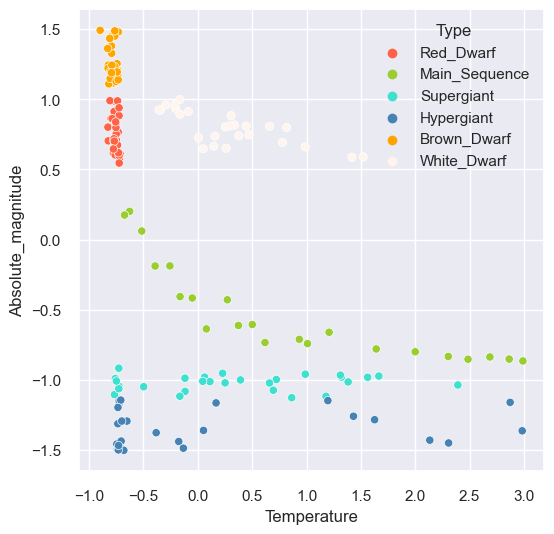

In [35]:
palette = {"Brown_Dwarf":"orange",
           "Red_Dwarf":"tomato",
           "White_Dwarf":"seashell",
           "Main_Sequence":"yellowgreen",
           "Supergiant":"turquoise",
           "Hypergiant":"steelblue"}

f, axs = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(ax = axs, 
                data = st_df_train, x = "Temperature", y = "Absolute_magnitude", hue="Type",
              palette = palette)
;

## Sem normalização

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_values, y_classe, test_size = 0.3)

In [38]:
X_df_train = pd.DataFrame(X_train, columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude', 'Star_color', 'Spectral_class'])
y_df_train = pd.DataFrame(y_train, columns = ['Type'])
df_train = pd.concat([X_df_train,y_df_train], axis = 1)

X_df_test = pd.DataFrame(st_X_test, columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude', 'Star_color', 'Spectral_class'])
y_df_test = pd.DataFrame(st_y_test, columns = ['Type'])
df_test = pd.concat([X_df_test,y_df_test], axis = 1)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
palette = {"Brown_Dwarf":"orange",
           "Red_Dwarf":"tomato",
           "White_Dwarf":"gold",
           "Main_Sequence":"yellowgreen",
           "Supergiant":"turquoise",
           "Hypergiant":"steelblue"}

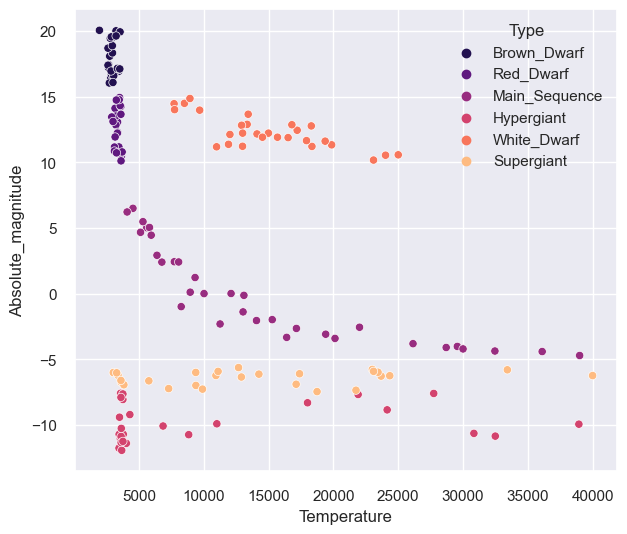

In [62]:
f, axs = plt.subplots(figsize=(7, 6))


axs = sns.scatterplot( 
                data = df_train, x = "Temperature", y = "Absolute_magnitude", 
                hue="Type",
                palette = "magma")

axs.legend(title='Type', loc='upper right');

### Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
previsores = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude', 'Star_color', 'Spectral_class']

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo_tree = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = params,
    cv = 10,
    n_jobs = 5,
    verbose = 1,
)

In [ ]:
class Arvore:
    modelo = None
    prev_tree = None
    
    def __init__(self, X_treino, y_treino, X_teste, y_teste):
        self.X_treino = X_treino
        self.y_treino = y_treino
        self.X_teste = X_teste
        self.y_teste = y_teste
    
    def transform(self):
        model = modelo_tree.fit(self.X_treino, self.y_treino)
        
        cr = model.best_params_["criterion"]
        md = model.best_params_["max_depth"]
        mf = model.best_params_["max_features"]
        
        print(model.best_params_)
        
        print("\nScore = ", model.best_score_)
        
        self.modelo = DecisionTreeClassifier(max_depth = md, criterion = cr, max_features = mf)
        self.modelo.fit(self.X_treino, self.y_treino)
        prev_tree = self.modelo.predict(self.X_teste)
        
        print("\nAccuracy", accuracy_score(self.y_teste, prev_tree))
        
        print("\n", classification_report(self.y_teste, prev_tree))
        
    def matriz(self):
        cm = ConfusionMatrix(self.modelo)
        cm.fit(self.X_treino, self.y_treino)
        cm.score(self.X_teste, self.y_teste);
        
    def plotArvore(self):
        fig, ax = plt.subplots(figsize = (10,10))
        tree.plot_tree(
            self.modelo, 
            feature_names = previsores, 
            class_names = self.modelo.classes_, 
            filled=True);

#### Normal

In [ ]:
arvore = Arvore(X_train, y_train, X_test, y_test)
arvore.transform()

In [ ]:
arvore.matriz()

In [ ]:
arvore.plotArvore()

#### Com Normalização

In [ ]:
st_tree = Arvore(st_X_train, st_y_train, st_X_test, st_y_test)
st_tree.transform()

In [ ]:
st_tree.matriz()

In [ ]:
st_tree.plotArvore()

#### Com PCA

In [ ]:
pca_tree = Arvore(pca_X_train, pca_y_train, pca_X_test, pca_y_test)
pca_tree.transform()

In [ ]:
pca_tree.matriz()

In [ ]:
pca_tree.plotArvore()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {
    'n_estimators': [100, 200, 500],
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'auto' 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo_forest = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = params,
    cv = 5,
    n_jobs = 5,
    verbose = 1,
)

In [ ]:
class Floresta:
    modelo = None
    prev_forest = None
    
    def __init__(self, X_treino, y_treino, X_teste, y_teste):
        self.X_treino = X_treino
        self.y_treino = y_treino
        self.X_teste = X_teste
        self.y_teste = y_teste
    
    def transform(self):
        model = modelo_forest.fit(self.X_treino, self.y_treino)
        
        num = model.best_params_["n_estimators"]
        cr = model.best_params_["criterion"]
        md = model.best_params_["max_depth"]
        mf = model.best_params_["max_features"]
        
        print(model.best_params_)
        
        print("\nScore = ", model.best_score_)
        
        self.modelo = RandomForestClassifier(n_estimators = num, max_depth = md, criterion = cr, max_features = mf)
        self.modelo.fit(self.X_treino, self.y_treino)
        prev_forest = self.modelo.predict(self.X_teste)
        
        print("\nAccuracy", accuracy_score(self.y_teste, prev_forest))
        
        print("\n", classification_report(self.y_teste, prev_forest))
    
    def matriz(self):
        cm = ConfusionMatrix(self.modelo)
        cm.fit(self.X_treino, self.y_treino)
        cm.score(self.X_teste, self.y_teste);

In [ ]:
floresta = Floresta(X_train, y_train, X_test, y_test)
floresta.transform()

In [ ]:
floresta.matriz()

In [ ]:
st_forest = Floresta(st_X_train, st_y_train, st_X_test, st_y_test)
st_forest.transform()

In [ ]:
st_forest.matriz()

In [ ]:
pca_forest = Floresta(pca_X_train, pca_y_train, pca_X_test, pca_y_test)
pca_forest.transform()

In [ ]:
pca_forest.matriz()